In [1]:
import numpy as np 
from loss_quartets import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
# class RootedQuartet:
#     '''
#     This class is used to store a particular rooted binary tree on four leaves and to calculate the Dollo loss on it.
#     It is more wordy but should be more efficient than actually calling Dollo, since it is specifically tailored to handle quartets.
#     '''
#     def __init__(self, type, labels, pair):
#         # pair: a pair of two names
#         '''
#         Initializes the RootedQuartet.
#         @params
#         type: BAL and LOP (balanced, lopsided)
#             BAL: ((a, b), (c, d)), described by an unordered pair (a, b). 
#             LOP: (a, (b, (c, d))), described by an ORDERED pair (a, b).
#         labels: list of four names of the leaves
#         pair: a pair of names which must be in labels, described above
        
#         leaves are stored numerically as integers [0-3], self.labels is a mapping from integer to string. 
#         For example, calling
#         RootedQuartet("BAL", ["a", "b", "c", "d"], ("a", "b")) -> ((a, b), (c, d))
#         RootedQuartet("LOP", ["a", "b", "c", "d"], ("c", "b")) -> (c, (b, (a, d)))
#         '''
#         assert(type in ['BAL', 'LOP'])
#         assert(pair[0] in labels and pair[1] in labels)
#         self.labels = labels 
#         self.type = type 
#         self.pair = [labels.index(n) for n in pair]
#         self.oth = [i for i in range(4) if i not in self.pair]
#         self.loss = 0
    
#     def unrooted_quartet(self):
#         '''
#         Returns the unrooted quartet, which is the same regardless of the type.
#         '''
#         names = [self.labels[idx] for idx in self.pair] + [self.labels[idx] for idx in self.oth]
#         if self.type == "BAL":
#             return f"(({names[0]},{names[1]}),({names[2]},{names[3]}));"
#         else:
#             return f"({names[0]},({names[1]},({names[2]},{names[3]})));"

#     def rooted_quartet(self, r = 'r'):
#         '''
#         Returns the rooted quartet in unrooted form by adding an extra node r on the root. Make sure r is not a name of any leaf.
#         @param 
#         r: the name of the extra node

#         NOTE: When running ASTRAL with extra bipartitions, remember to add r to the bipartitions too!
#         '''
#         names = [self.labels[idx] for idx in self.pair] + [self.labels[idx] for idx in self.oth]
#         if self.type == "BAL":
#             return f"({r},({names[0]},{names[1]}),({names[2]},{names[3]}));"
#         else:
#             return f"({r},{names[0]},({names[1]},({names[2]},{names[3]})));"

#     def add_states(self, l): 
#         # l: list of names of leaves for which some state is present
#         assert(all([n in self.labels for n in l]))
#         l = sorted([self.labels.index(n) for n in l])
#         if(len(l) == 0 or len(l) == 1 or len(l) == 4):
#             # trivial cases: if no leaves, all leaves, or just one leaf has some state, then no losses are needed.
#             return
#         elif(len(l) == 3):
#             # BAL: born at root, loss at the one leaf without the state
#             # LOP: no loss only if the states form a clade.
#             if self.type == "LOP" and self.pair[0] not in l:
#                 # (a, (b, (c, d))) and l = [b, c, d]
#                 pass
#             else:
#                 self.loss += 1
#         else: 
#             # len(l) = 2
#             # no loss if states form a clade. 
#             if self.type == "BAL":
#                 if sorted(self.pair) == l or sorted(self.oth) == l:
#                     # ((a, b), (c, d)) and l = [a, b] or l = [c, d]
#                     pass
#                 else:
#                     self.loss += 2
#             else:
#                 if sorted(self.oth) == l:
#                     # no loss if clade
#                     # (a, (b, (c, d))) and l = [c, d]
#                     pass
#                 elif self.pair[1] in l:
#                     # if (a, (b, (c, d))) and b is selected, only 1 loss is required
#                     # [a, b], [b, c], [b, d]
#                     self.loss += 1
#                 else:
#                     # otherwise [a, c] or [a, d], and requires 2
#                     self.loss += 2

In [23]:
data = [{
    'a': [1],
    'b': [1],
    'c': [3],
    'd': [4],
},
{
    'a': [1],
    'b': [2],
    'c': [3],
    'd': [4],
}
]

In [24]:
# def get_best_quartets_loss(data):
#     '''
#     Gets the best quartet trees from data
#     @param: data is a dictionary name -> list of exhibited states. 
#     ''' 
#     names = list(data.keys())

#     state_leaves = {}

#     # get a dict state_leaves mapping state -> list of leaves which have that state
#     for leaf, states in data.items():
#         for s in states:
#             if s not in state_leaves:
#                 state_leaves[s] = []
#             state_leaves[s].append(leaf)
        
#     # get all 15 possible trees
#     possible_trees = [RootedQuartet("LOP", names, (names[i], names[j])) for i in range(4) for j in range(4) if i != j] + [RootedQuartet("BAL", names, (names[0], names[i])) for i in range(1, 4)]

#     # calculate loss for all trees
#     for _, leaves in state_leaves.items():
#         for tree in possible_trees:
#             tree.add_states(leaves)

#     # rank and find trees with best score
#     tree_scores = sorted([(tree.loss, tree.unrooted_quartet()) for tree in possible_trees])
#     best_trees = [t for (l, t) in tree_scores if l == tree_scores[0][0]]

#     return best_trees
#     # 

In [25]:
res = get_best_quartets_loss(data[0])
for t in res:
    print(t.rooted_quartet())

(r,c,(d,(a,b)));
(r,d,(c,(a,b)));
(r,(a,b),(c,d));


In [26]:
import pandas as pd
from itertools import combinations
from loss_quartets import *


df = pd.read_csv("/home/zxliu2/QuartetMethods/example/simulated_data-1.0/veryhigh_noborrowing/sim_tree1_2.csv")

In [27]:
mode = 4
assert(4 <= mode <= 5)
quartets = {}
vals = df.values
df

,id,feature,weight,t1,t2,t3,t4,t5,t6,t7,...,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30
0,mh0,mh0,50.0,1,1,1,1,4,4,4,...,9,4,9,4,10,4,4,9,12,12
1,mh1,mh1,50.0,1,1,38,40,1,1,1,...,1,1,47,1,1,46,46,1,48,48
2,mh2,mh2,50.0,1,1,1,1,1,8,1,...,9,0,9,18,9,17,17,9,1,1
3,mh3,mh3,50.0,8,1,1,1,5,5,5,...,0,6,0,0,0,0,0,0,1,1
4,mh4,mh4,50.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,lnphnh12,lnphnh12,1.0,1,33,1,1,41,47,47,...,93,82,94,85,100,84,89,70,110,109
316,lnphnh13,lnphnh13,1.0,1,7,18,6,29,29,29,...,61,49,64,50,61,57,49,66,82,86
317,lnphnh14,lnphnh14,1.0,1,2,2,2,2,2,2,...,51,28,51,28,68,43,31,51,80,2
318,lnphnh15,lnphnh15,1.0,1,8,17,17,45,45,45,...,52,71,52,65,52,68,63,52,79,83


In [28]:
N, M = vals.shape
N, M

(320, 33)

In [29]:
values = df.values[:, 3:]
names = df.columns.values[3:]

In [30]:
quartets = {}
quartet_count = []
for row in tqdm(values): 
    states_dict = {
        n: s.split('/') for (n, s) in zip(names, row)
    }
    #print(states_dict)
    for tup in combinations(names, 4):
        best_trees = get_best_quartets_loss({
            x : states_dict[x] for x in tup
        })
        quartet_count.append(len(best_trees))
        for tree in best_trees:
            tup = tree.get_unrooted_tuple()
            if tup not in quartets:
                quartets[tup] = 0
            quartets[tup] += 1

 17%|█▋        | 55/320 [01:06<05:21,  1.21s/it]


KeyboardInterrupt: 

/home/zxliu2/.conda/envs/phylo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


True


<Axes: ylabel='Count'>

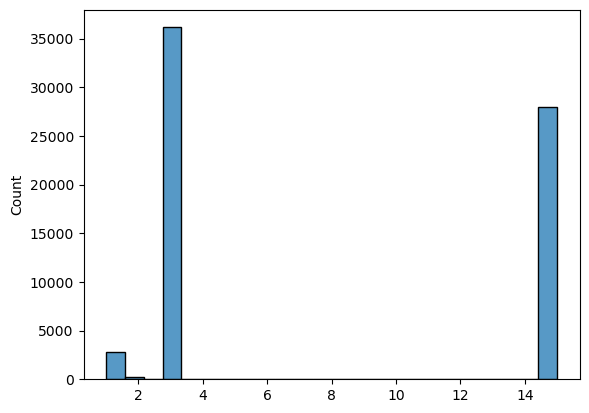

In [ ]:
quartet_count = np.array(quartet_count)
print(np.all((quartet_count <= 15) & (quartet_count > 0)))
sns.bar(quartet_count)

In [ ]:
# def get_best_quartets_loss(data):
#     '''
#     Gets the best quartet trees from data
#     @param: data is a dictionary name -> list of exhibited states. 
#     ''' 
#     names = list(data.keys())

#     state_leaves = {}

#     # get a dict state_leaves mapping state -> list of leaves which have that state
#     for leaf, states in data.items():
#         for s in states:
#             if s not in state_leaves:
#                 state_leaves[s] = []
#             state_leaves[s].append(leaf)
        
#     # get all 15 possible trees
#     possible_trees = [RootedQuartet("LOP", names, (names[i], names[j])) for i in range(4) for j in range(4) if i != j] + [RootedQuartet("BAL", names, (names[0], names[i])) for i in range(1, 4)]

#     # calculate loss for all trees
#     for _, leaves in state_leaves.items():
#         for tree in possible_trees:
#             tree.add_states(leaves)

#     # rank and find trees with best score
#     tree_scores = sorted([(tree.loss, tree.rooted_quartet()) for tree in possible_trees])
#     for l, tree in tree_scores:
#         print(f"{tree}\t{l}")
#     best_trees = [t for (l, t) in tree_scores if l == tree_scores[0][0]]

#     return best_trees

In [ ]:
get_best_quartets_loss({
    'a': [0],
    'b': [5, 1],
    'c': [5, 2],
    'd': [3]
})

In [ ]:
vals = df.values
for i, row in enumerate(vals):
    flg = any([type(k) == str and '/' in k for k in row])
    # if(flg):
    #     print(i, row)


row = vals[177]
print(row)

['lpmnh67' 'lpmnh67' 1.0 '3' '2' '1/14' '7' '7/11' '10' '10' '13' '7' '7']


In [ ]:
quartets = {}
names = df.columns.values[3:]
row = row[3:]

names = names[:5]
row = row[:5]
print("NAMES = ", names)
print("ROW = ", row)

states_dict = {
    n: s.split('/') for (n, s) in zip(names, row)
}
print(states_dict)
for nametup in combinations(names, 4):
    d = {
        x : states_dict[x] for x in nametup
    }
    best_trees = get_best_quartets_loss(d)

    if(len(best_trees) >= 15): # when all trees have the same score, no information is supplied.
        continue
    
    # list of best trees -> get quartets from them -> turn back into a list
    best_trees = list(map(lambda x: x.rooted_quartet(), best_trees))

    for tup in best_trees:
        if tup not in quartets:
            quartets[tup] = 0
        quartets[tup] += 1

    print(best_trees, d)
# return (None, quartets)
# where quartets is a dict (a,b,c,d) -> w


NAMES =  ['t1' 't2' 't3' 't4' 't5']
ROW =  ['3' '2' '1/14' '7' '7/11']
{'t1': ['3'], 't2': ['2'], 't3': ['1', '14'], 't4': ['7'], 't5': ['7', '11']}
['(r,t1,(t2,(t4,t5)));', '(r,t2,(t1,(t4,t5)));', '(r,(t1,t2),(t4,t5));'] {'t1': ['3'], 't2': ['2'], 't4': ['7'], 't5': ['7', '11']}
['(r,t1,(t3,(t4,t5)));', '(r,t3,(t1,(t4,t5)));', '(r,(t1,t3),(t4,t5));'] {'t1': ['3'], 't3': ['1', '14'], 't4': ['7'], 't5': ['7', '11']}
['(r,t2,(t3,(t4,t5)));', '(r,t3,(t2,(t4,t5)));', '(r,(t2,t3),(t4,t5));'] {'t2': ['2'], 't3': ['1', '14'], 't4': ['7'], 't5': ['7', '11']}
